<a href="https://colab.research.google.com/github/tankiet14102001/PM2.5-visualization_2D/blob/test-plot-and-save-branch/notebooks/PM2_5_visualization_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os

# CHANGE THIS BELOW PATHS TO YOUR OWN DRIVE PATH CONTAINED YOUR FOLDER DATASET
#path = '/content/gdrive/My Drive/Colab Notebooks/projects/thesis_dust-box_from-20240106/data/BKbox/'
path = '/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/data/train/'
os.chdir(path)
os.listdir()  # current folder structure in top layer

Mounted at /content/gdrive


['2000-01-01.csv',
 '2024-06-03.csv',
 '2024-06-02.csv',
 '2024-04-29.csv',
 '2024-05-29.csv',
 '2024-06-04.csv',
 '2024-05-30.csv',
 '2024-05-28.csv',
 '2000-01-01.txt',
 '2024-04-29.txt',
 '2024-05-29.txt',
 '2024-05-28.txt',
 '2024-05-30.txt',
 '2024-06-02.txt',
 '2024-06-04.txt',
 '2024-06-03.txt',
 '2024-06-05.txt',
 '2024-06-24.txt']

In [33]:
import pandas as pd
import re

file_name = '2024-05-28';

# Define the wanted columns
#wanted_columns = ['DateTime', 'Temp', 'Humi', 'PM1_0', 'PM2_5', 'PM10', 'Lat', 'Long']
wanted_columns = ['DateTime', 'Temp', 'Humi', 'PM1_0', 'PM2_5', 'PM10', 'Lat', 'Long', 'Alt']

# Load the data into a DataFrame
try:
  df = pd.read_csv(file_name + '.txt', sep=',', encoding='latin1', on_bad_lines='skip')
except pd.errors.ParserError as e:
  print("ParserError:", e)
  df = pd.DataFrame() # Create an empty DataFrame in case of error

print(df)

if not df.empty:
    # Select only the wanted columns
    if set(wanted_columns).issubset(df.columns):
        df = df[wanted_columns]
    else:
        missing_columns = set(wanted_columns) - set(df.columns)
        print(f"Missing columns: {missing_columns}")

# Define a function to check for invalid characters in a row
def has_invalid_characters(row):
    for value in row:
        if re.search(r'[^a-zA-Z0-9:.,\-_ ]', str(value)):
            return True
    return False

# Filter out rows with invalid characters
df = df[~df.apply(has_invalid_characters, axis=1)]

print(df)
# Print the resulting DataFrame
print(df.head())

     DeviceName             DateTime  Temp  Humi     Press  PM1_0  PM2_5  \
0       SPARC-1  2024-05-28T12:16:57  32.6  61.1  0.994556     22     32   
1       SPARC-1  2024-05-28T12:17:02  32.6  61.0  0.994553     23     33   
2       SPARC-1  2024-05-28T12:17:07  32.6  61.0  0.994555     22     32   
3       SPARC-1  2024-05-28T12:17:12  32.6  61.0  0.994555     22     32   
4       SPARC-1  2024-05-28T12:17:18  32.6  60.9  0.994554     22     33   
...         ...                  ...   ...   ...       ...    ...    ...   
3718    SPARC-1  2024-05-28T23:49:53  40.8  39.4  0.994555     32     46   
3719    SPARC-1  2024-05-28T23:49:58  40.8  39.2  0.994548     31     45   
3720    SPARC-1  2024-05-28T23:50:03  40.8  39.2  0.994548     31     45   
3721    SPARC-1  2024-05-28T23:50:08  40.9  39.1  0.994549     32     46   
3722    SPARC-1  2024-05-28T23:50:14  40.9  40.4  0.994547     32     46   

      PM10       Bat        Lat        Long   Alt  
0       35  0.320648   0.000000    

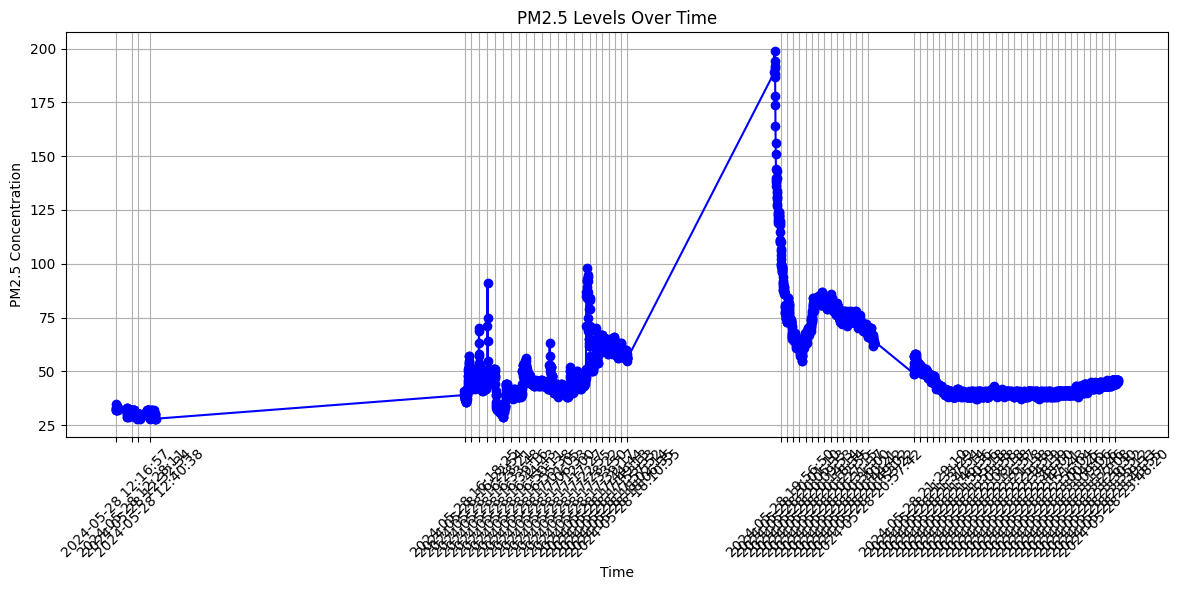

In [34]:
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable called df
# If not, read the CSV file first using pd.read_csv()

# Use a try-except block to handle inconsistent datetime formats
try:
    # Convert the 'DateTime' column to datetime format with the specified format
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
except ValueError as e:
    # Print the error message
    print(f"Error: {e}")

    # Find the problematic rows based on the error message and drop them
    problematic_rows = df[df['DateTime'].isnull()].index
    df = df.drop(problematic_rows)

# Plot PM2.5 with respect to time
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['PM2_5'], marker='o', linestyle='-', color='b')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')

# Set the x-axis ticks to be every Nth element for better readability
N = 50  # Change N to the desired interval
plt.xticks(df['DateTime'][::N], df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')[::N], rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/figures/' + file_name + '_raw.jpg')
plt.show()

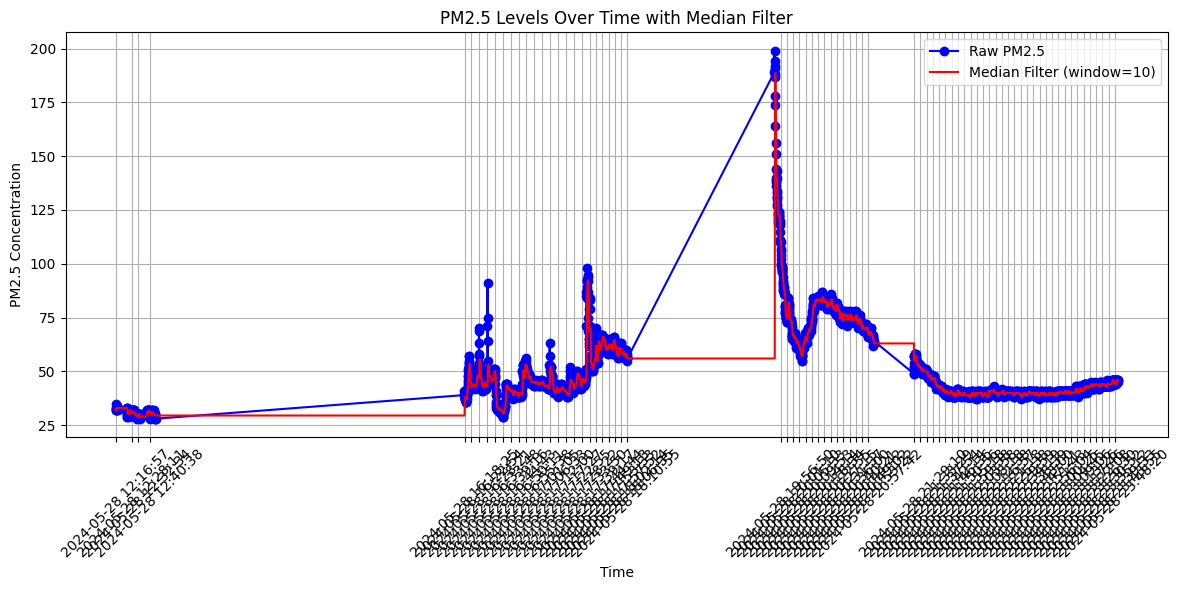

In [35]:
# Assuming your data is stored in a variable called df
# If not, read the CSV file first using pd.read_csv()

# Use a try-except block to handle inconsistent datetime formats
try:
    # Convert the 'DateTime' column to datetime format with the specified format
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%dT%H:%M:%S')
except ValueError as e:
    # Print the error message
    print(f"Error: {e}")

    # Find the problematic rows based on the error message and drop them
    problematic_rows = df[df['DateTime'].apply(lambda x: pd.to_datetime(x, errors='coerce') is pd.NaT)].index
    df = df.drop(problematic_rows)

# Apply a median filter to PM2.5 data
window_size = 10  # Adjust the window size as needed
df['PM2_5_median_filtered'] = df['PM2_5'].rolling(window=window_size, min_periods=1).median()

# Plot PM2.5 and its median filtered version with respect to time
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['PM2_5'], marker='o', linestyle='-', color='b', label='Raw PM2.5')
plt.plot(df['DateTime'], df['PM2_5_median_filtered'], color='r', linestyle='-', label=f'Median Filter (window={window_size})')
plt.title('PM2.5 Levels Over Time with Median Filter')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')

# Set the x-axis ticks to be every Nth element for better readability
N = 50  # Change N to the desired interval
plt.xticks(df['DateTime'][::N], df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')[::N], rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/figures/' + file_name + '_with-median-filter.jpg')
plt.show()

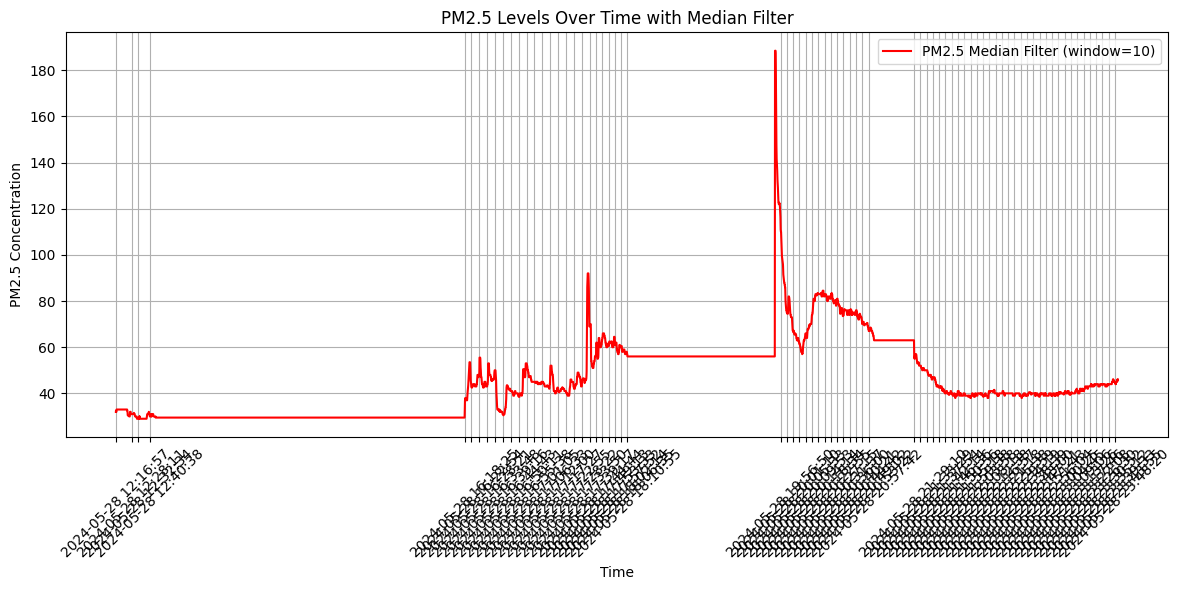

In [36]:
# Assuming your data is stored in a variable called df
# If not, read the CSV file first using pd.read_csv()

# Use a try-except block to handle inconsistent datetime formats
try:
    # Convert the 'DateTime' column to datetime format with the specified format
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%dT%H:%M:%S')
except ValueError as e:
    # Print the error message
    print(f"Error: {e}")

    # Find the problematic rows based on the error message and drop them
    problematic_rows = df[df['DateTime'].apply(lambda x: pd.to_datetime(x, errors='coerce') is pd.NaT)].index
    df = df.drop(problematic_rows)

# Apply a median filter to PM2.5 data
window_size = 10  # Adjust the window size as needed
df['PM2_5_median_filtered'] = df['PM2_5'].rolling(window=window_size, min_periods=1).median()

# Plot only the median filtered PM2.5 data with respect to time
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['PM2_5_median_filtered'], color='r', linestyle='-', label=f'PM2.5 Median Filter (window={window_size})')
plt.title('PM2.5 Levels Over Time with Median Filter')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')

# Set the x-axis ticks to be every Nth element for better readability
N = 50  # Change N to the desired interval
plt.xticks(df['DateTime'][::N], df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')[::N], rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/figures/' + file_name + '_median-filter.jpg')
plt.show()

In [37]:
# Define the directory and file name for the new file
#output_directory = '/content/gdrive/My Drive/Colab Notebooks/projects/thesis_dust-box_from-20240106/data/BKbox/filtered_data/'
output_directory = '/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/data_filtered/'
output_file_name = file_name + '_filtered_data.txt'

# Save the filtered DataFrame to a new CSV file
df.to_csv(output_directory + output_file_name, index=False)

print("Filtered data has been saved to:", output_directory + output_file_name)


Filtered data has been saved to: /content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/data_filtered/2024-05-28_filtered_data.txt


In [38]:
import folium
import pandas as pd

# Define the AQI dictionary
aqi = {
    'Good': {'pm2.5': [0, 12], 'color': '#006400'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': '#FFD700'},
    'Unhealthy for Sensitive Groups': {'pm2.5': [35.5, 55.4], 'color': '#FF8C00'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}
}
"""
# Load data from the CSV file with error handling
try:
    df = pd.read_csv('2023-12-05.txt', sep=',', encoding='latin1')
except pd.errors.ParserError as e:
    print("ParserError:", e)
"""

"""
# Keep only the desired columns
df = df[['DateTime', 'Temp', 'Humi', 'PM2_5', 'Lat', 'Long', 'Alt']]
"""

# Remove rows with invalid PM2_5 data
df = df[df['PM2_5'].apply(lambda x: str(x).replace('.', '').isdigit())]
df['PM2_5'] = pd.to_numeric(df['PM2_5'], errors='coerce')

# Convert latitude and longitude columns to numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Remove rows with NaN values in Lat and Long
df = df.dropna(subset=['Lat', 'Long'])

# Create a map centered at the mean latitude and longitude of your data
map_center = [df['Lat'].mean(), df['Long'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)



# Add markers for each data point with PM2.5 data displayed inside the circle marker
for index, row in df.iterrows():
    # Determine the AQI category based on PM2.5 value
    pm2_5 = row['PM2_5']
    aqi_category = None
    for category, data in aqi.items():
        if pm2_5 >= data['pm2.5'][0] and pm2_5 <= data['pm2.5'][1]:
            aqi_category = category
            break

    # Determine marker color based on AQI category
    marker_color = aqi[aqi_category]['color']

    # Add CircleMarker with the specified radius
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=5,  # Adjust the size of the marker
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=1,
        popup=f"PM2.5: {pm2_5}, AQI: {aqi_category}"
    ).add_to(mymap)

    # Add text to display PM2.5 value inside the circle marker
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=folium.DivIcon(
            icon_size=(50, 50),
            icon_anchor=(25, 25),
            #html=f"<div style='display: flex; justify-content: center; align-items: center; width: 100%; height: 100%; color: black; font-size: 8px;'>{pm2_5}</div>",
        )
    ).add_to(mymap)

# Add a legend for AQI categories
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 200px; height: 200px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity: 0.9;
                 ">
     &nbsp; AQI Legend <br>
     &nbsp; Good: <i class="fas fa-circle" style="color:#006400; font-size: 24px;"></i><br>
     &nbsp; Moderate: <i class="fas fa-circle" style="color:#FFD700; font-size: 24px;"></i><br>
     &nbsp; Unhealthy for Sensitive Groups: <i class="fas fa-circle" style="color:#FF8C00; font-size: 24px;"></i><br>
     &nbsp; Unhealthy: <i class="fas fa-circle" style="color:red; font-size: 24px;"></i><br>
     &nbsp; Very Unhealthy: <i class="fas fa-circle" style="color:purple; font-size: 24px;"></i><br>
     &nbsp; Hazardous: <i class="fas fa-circle" style="color:maroon; font-size: 24px;"></i><br>
      </div>
     """
mymap.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
#mymap.save("/content/gdrive/My Drive/Colab Notebooks/projects/thesis_dust-box_from-20240106/graph/" + file_name + "_filtered_data_map.html")
mymap.save("/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/graphs/" + file_name + "_filtered_data_map.html")


In [39]:
# Create a map centered at a location within South East Asia
map_center_sea = [10.0, 105.0]  # Choose a suitable latitude and longitude for the center
mymap_sea = folium.Map(location=map_center_sea, zoom_start=5)  # Adjust the zoom level as needed

# Add markers for each data point with PM2.5 data displayed inside the circle marker
for index, row in df.iterrows():
    # Determine the AQI category based on PM2.5 value
    pm2_5 = row['PM2_5']
    aqi_category = None
    for category, data in aqi.items():
        if pm2_5 >= data['pm2.5'][0] and pm2_5 <= data['pm2.5'][1]:
            aqi_category = category
            break

    # Determine marker color based on AQI category
    marker_color = aqi[aqi_category]['color']

    # Define custom HTML content for the popup
    popup_content = """
    <div style="max-width: 300px;">
        <b>DateTime:</b> {}<br>
        <b>PM2.5:</b> {}<br>
        <b>AQI:</b> {}<br>
        <b>Temperature:</b> {}<br>
        <b>Humidity:</b> {}<br>
        <b>Altitude:</b> {}<br>
    </div>
    """.format(row['DateTime'], pm2_5, aqi_category, row['Temp'], row['Humi'], row['Alt'])

    # Add CircleMarker with the specified radius
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=5,  # Adjust the size of the marker
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=1,
        popup=folium.Popup(popup_content, max_width=300),
    ).add_to(mymap_sea)

    # Add text to display PM2.5 value inside the circle marker
    # Add text to display PM2.5 value near the circle marker
    # Add text to display PM2.5 value above the circle marker
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=folium.DivIcon(
            icon_size=(0, 0),  # Set icon size to zero to hide the marker
            #html=f"<div style='color: black; font-size: 8px; position: relative; bottom: 20px; left: 50%; transform: translateX(-50%); display: inline-block;'>{pm2_5}</div>",
        )
    ).add_to(mymap_sea)



# Add a legend for AQI categories
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 300px;
            border: 2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.9;">
    <div style="padding-left: 10px;">
        <b>AQI Legend</b>
    </div>
    <ul style="list-style-type: none; padding-left: 20px; margin: 0;">
        <li><i class="fa fa-circle" style="color:#006400"></i>&nbsp; Good</li>
        <li><i class="fa fa-circle" style="color:#FFD700"></i>&nbsp; Moderate</li>
        <li><i class="fa fa-circle" style="color:#FF8C00"></i>&nbsp; Unhealthy for Sensitive Groups</li>
        <li><i class="fa fa-circle" style="color:red"></i>&nbsp; Unhealthy</li>
        <li><i class="fa fa-circle" style="color:purple"></i>&nbsp; Very Unhealthy</li>
        <li><i class="fa fa-circle" style="color:maroon"></i>&nbsp; Hazardous</li>
    </ul>
</div>
"""
mymap_sea.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
mymap_sea.save("/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_2D/output/graphs/" + file_name + "_filtered_data_map_sea.html")